In [1]:
# Data Ingestion

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Read the CSV file
df = pd.read_csv('../data/raw/ai4i2020.csv')

# Display the first 5 rows
df.head()

# Create 'Failure Type' target
df['Failure Type'] = df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].idxmax(axis=1)
df.loc[df['Machine failure'] == 0, 'Failure Type'] = 'No Failure'

# Verify distribution
df['Failure Type'].value_counts()

Failure Type
No Failure    9661
HDF            115
PWF             91
OSF             78
TWF             55
Name: count, dtype: int64

In [2]:
# Features
X = df.drop(['UDI', 'Product ID', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Failure Type'], axis=1)

# One-hot encode Type
X = pd.get_dummies(X, columns=['Type'], drop_first=True)

# Target
y = df['Failure Type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123, stratify=y
)

In [3]:
# Builds baseline multi-class classification model

# Create a pipeline with scaling and logistic regression
multi_model = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, class_weight='balanced', random_state=42))
])

multi_model.fit(X_train, y_train)


/Users/jeremyliu/anaconda3/envs/tf_env_clean/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,steps,"[('scaler', ...), ('logreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


              precision    recall  f1-score   support

         HDF      0.288     0.913     0.438        23
  No Failure      1.000     0.708     0.829      1932
         OSF      0.319     0.938     0.476        16
         PWF      0.291     0.889     0.438        18
         TWF      0.020     0.818     0.038        11

    accuracy                          0.714      2000
   macro avg      0.383     0.853     0.444      2000
weighted avg      0.975     0.714     0.814      2000



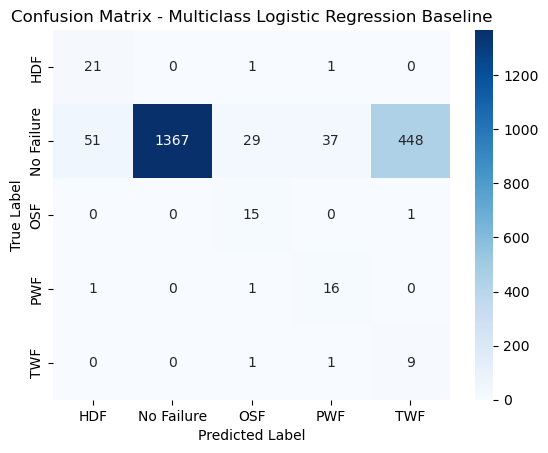

In [4]:
# Evaluate model

# Predictions
y_pred = multi_model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred, digits=3))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=multi_model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=multi_model.classes_, yticklabels=multi_model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Multiclass Logistic Regression Baseline")
plt.show()

In [5]:
# Majority class baseline

majority_class = df['Machine failure'].value_counts().idxmax()
majority_count = df['Machine failure'].value_counts().max()
total_count = len(df)
baseline_accuracy = majority_count / total_count

print(f"Majority class: {majority_class} (0 = No failure, 1 = Failure)")
print(f"Baseline accuracy: {baseline_accuracy:.3f}")

Majority class: 0 (0 = No failure, 1 = Failure)
Baseline accuracy: 0.966
